# This is a notebook for House price detection and Analysis

Steps we follow:
1. Exploratory Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df=pd.read_csv("/kaggle/input/regression-technique-eda/House Price Regression Tecnique/train.csv")
mydf=df

In [55]:
df.shape

(1460, 81)

In [56]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Here we try to find all the columns having null values and their percentage (this can also be done by df.isnull().sum() )

In [57]:
null_val=[i for i in df.columns if df[i].isnull().sum()>1]
for i in null_val:
    print(i,np.round(df[i].isnull().mean(),4))

LotFrontage 0.1774
Alley 0.9377
MasVnrType 0.5973
MasVnrArea 0.0055
BsmtQual 0.0253
BsmtCond 0.0253
BsmtExposure 0.026
BsmtFinType1 0.0253
BsmtFinType2 0.026
FireplaceQu 0.4726
GarageType 0.0555
GarageYrBlt 0.0555
GarageFinish 0.0555
GarageQual 0.0555
GarageCond 0.0555
PoolQC 0.9952
Fence 0.8075
MiscFeature 0.963


In [58]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In this step we are grouping all the null value col with SalePrice and plotting them

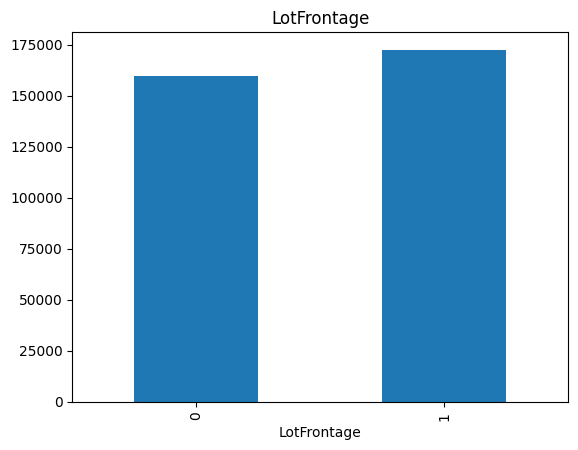

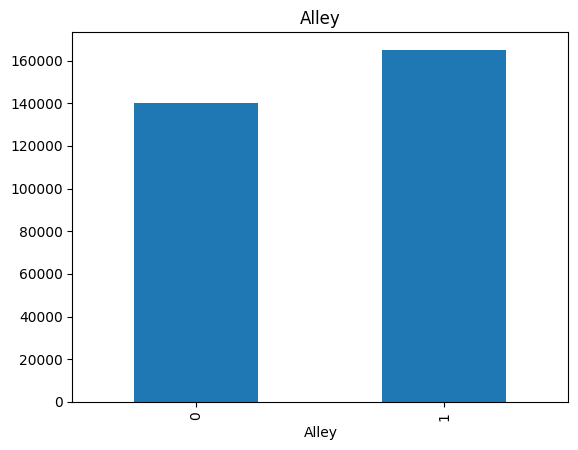

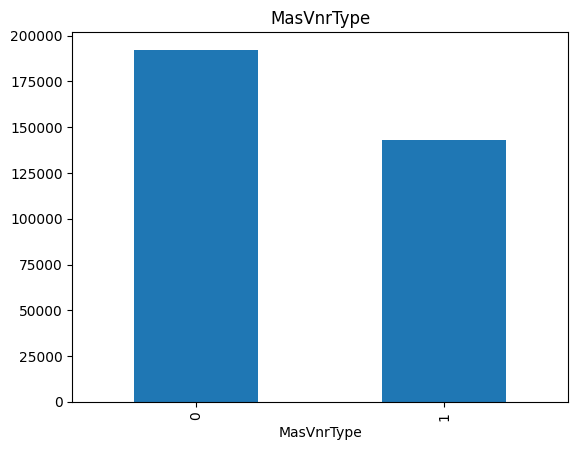

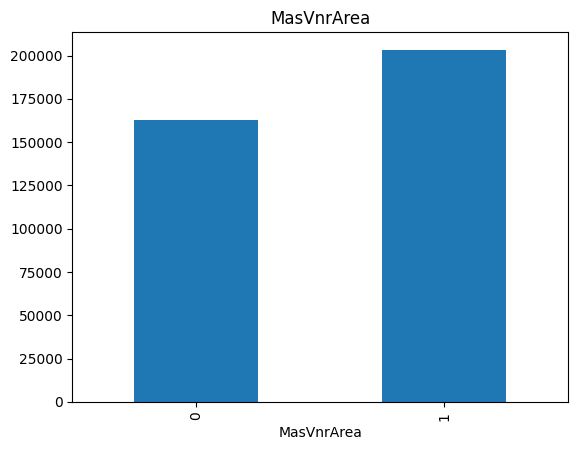

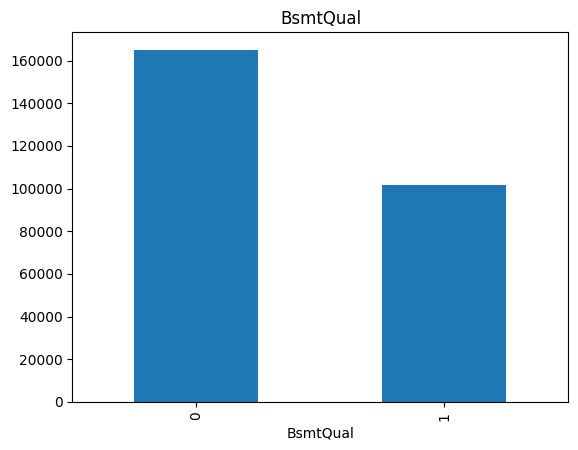

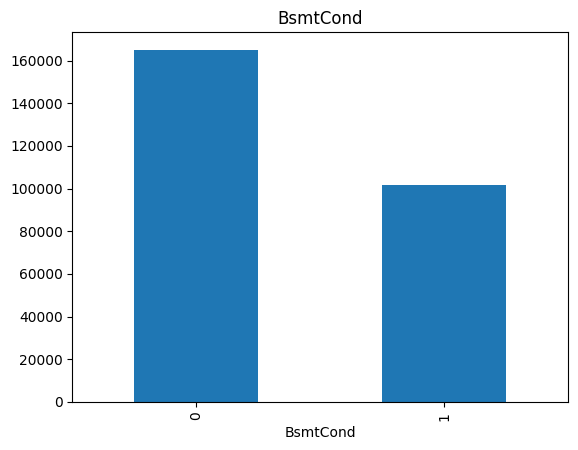

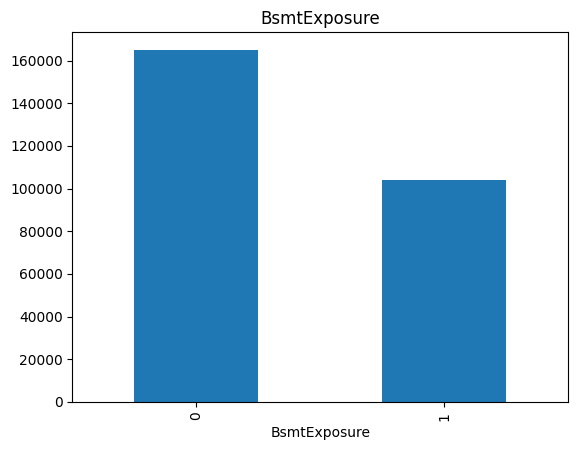

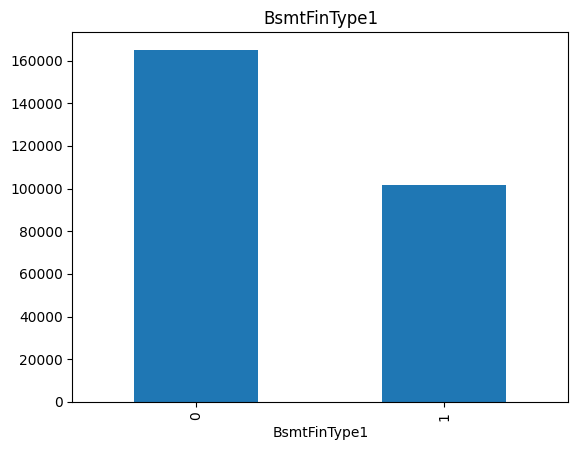

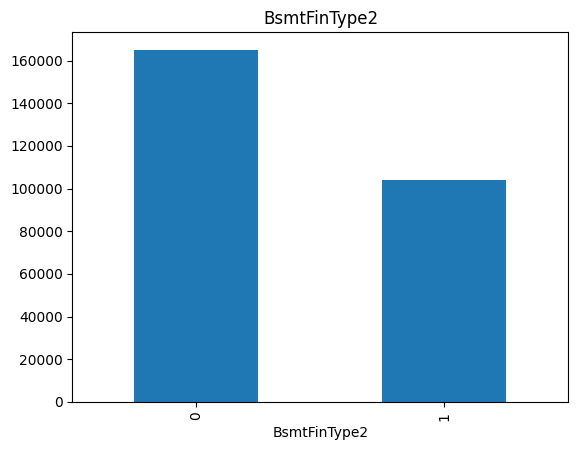

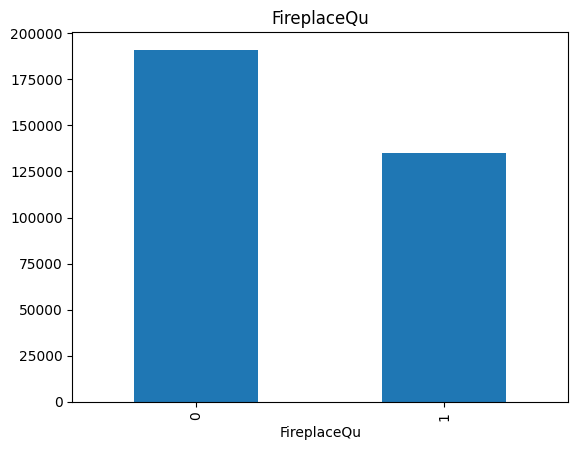

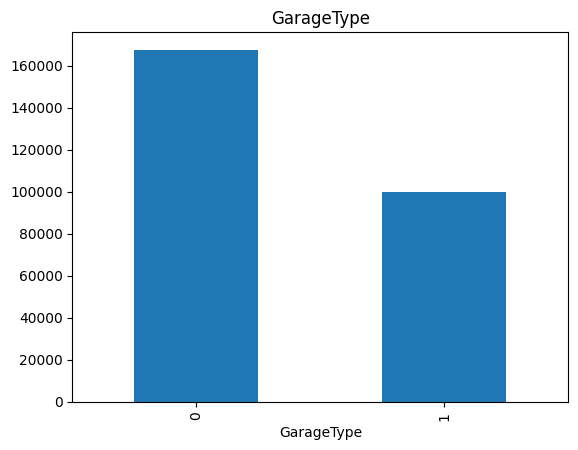

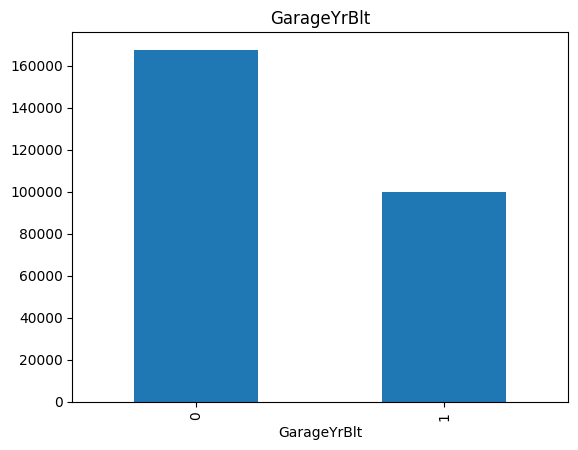

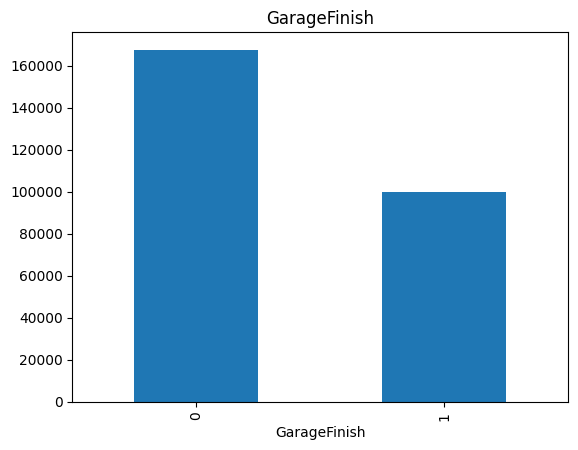

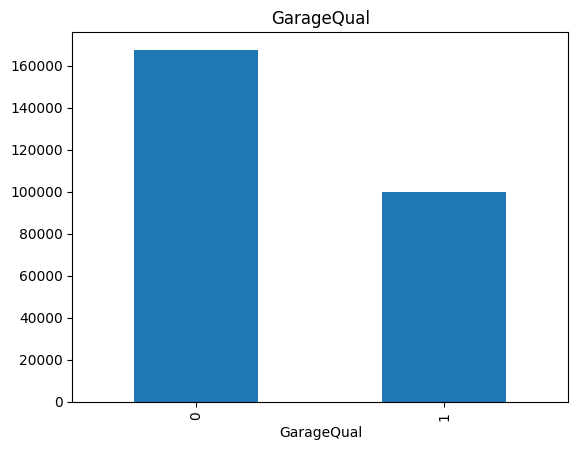

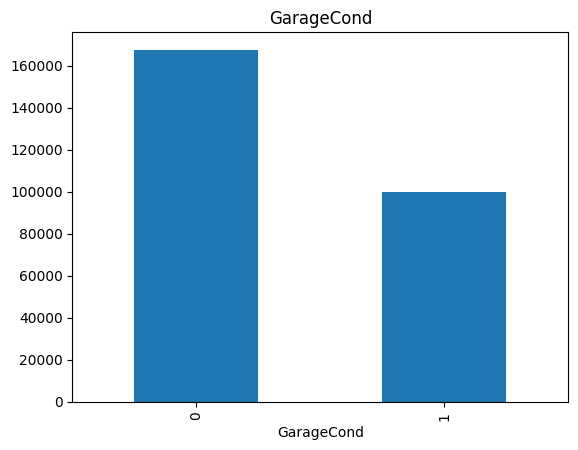

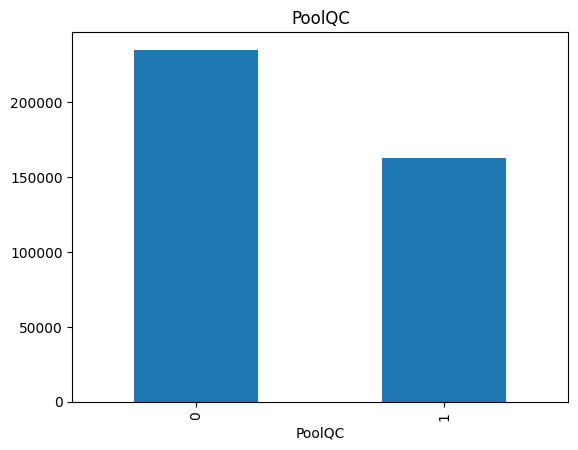

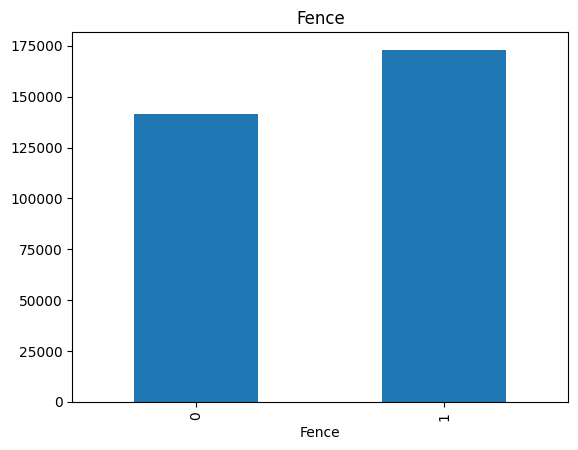

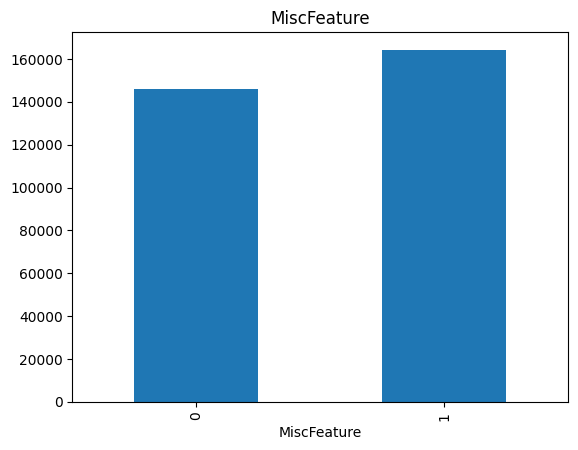

In [59]:
for i in null_val:
    data=df.copy()
    data[i]=np.where(data[i].isnull(),1,0)
    data.groupby(i)['SalePrice'].median().plot.bar()
    plt.title(i)
    plt.show()

Here we are finding the numerical valued columns from main dataset

In [60]:
num_val=[i for i in df.columns if df[i].dtypes!='O']
len(num_val)
df[num_val].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


Here the Columns which consist 'Year' values are segregated

In [61]:
year_val=[i for i in num_val if 'Year' in i or 'Yr' in i]
year_val

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'house price vs year sold')

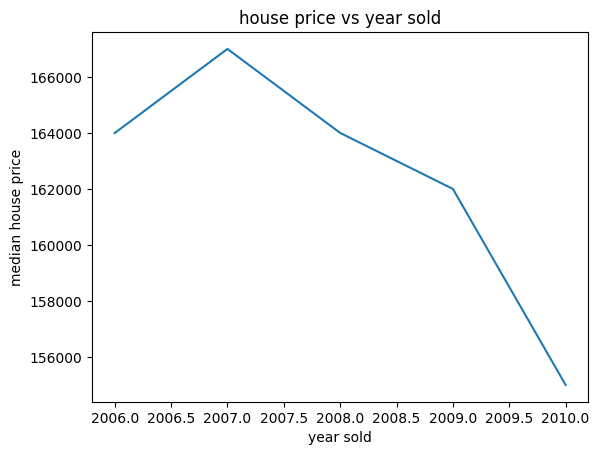

In [62]:
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel("year sold")
plt.ylabel("median house price")
plt.title("house price vs year sold")

Except YrSold remaining all year columns are plotted against SalePrice with year diff value

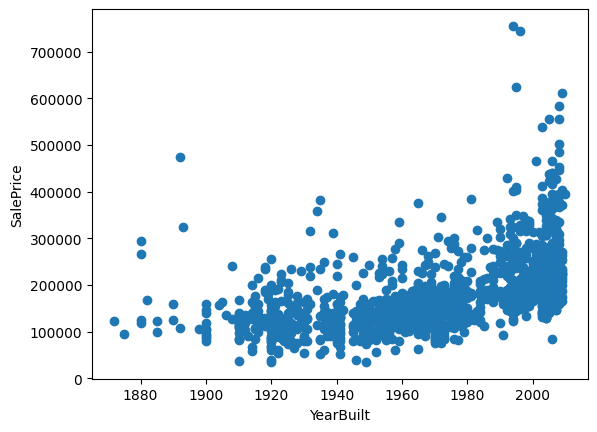

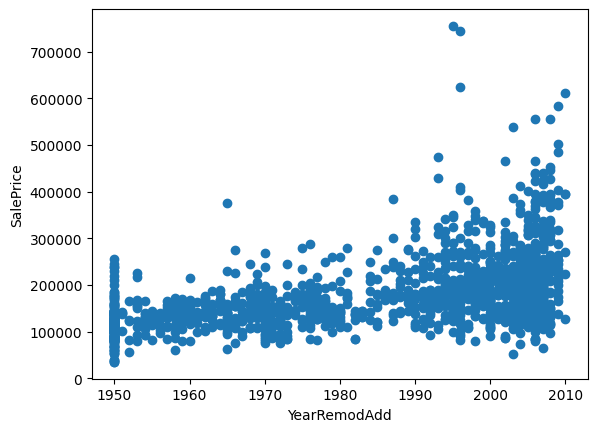

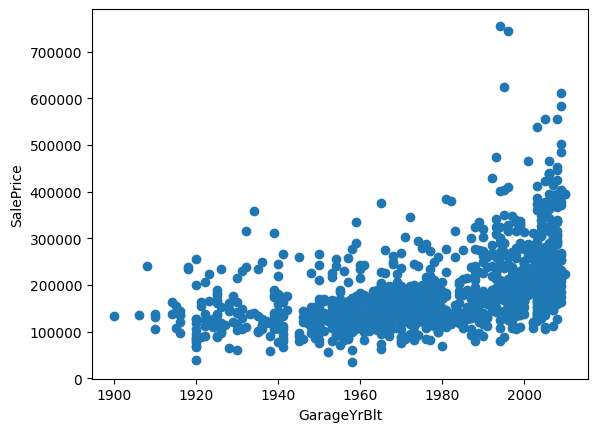

In [63]:
for i in year_val:
    if i!='YrSold':
        data=df.copy()
        data[i]=data['YrSold']-data[i]
        plt.scatter(df[i],df['SalePrice'])
        plt.xlabel(i)
        plt.ylabel("SalePrice")
        plt.show()
        

In this step we are finding the discrete columns and analysing them against the SalePrice

In [64]:
discrete_val=[i for i in num_val if len(df[i].unique())<25 and i not in year_val]
print(len(discrete_val))
discrete_val

17


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

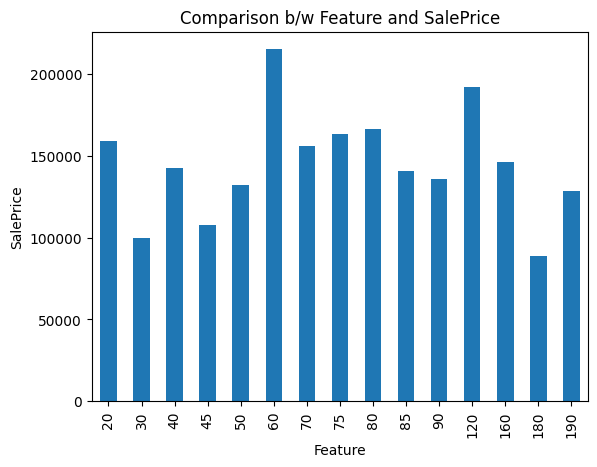

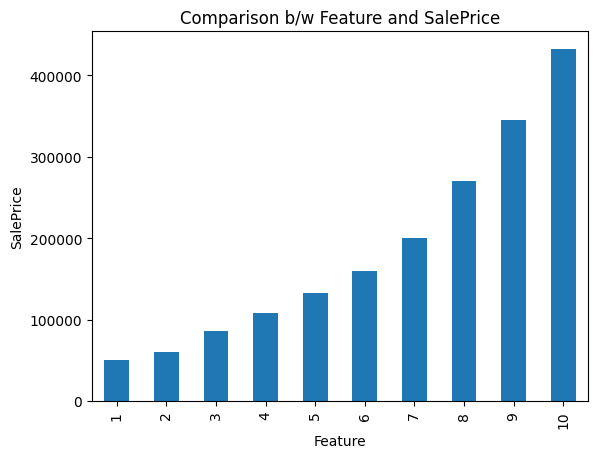

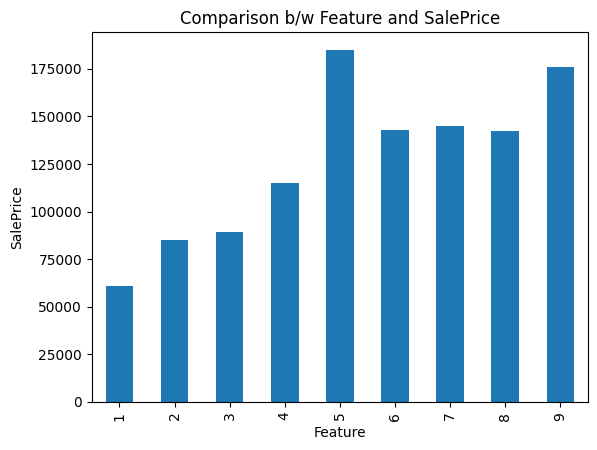

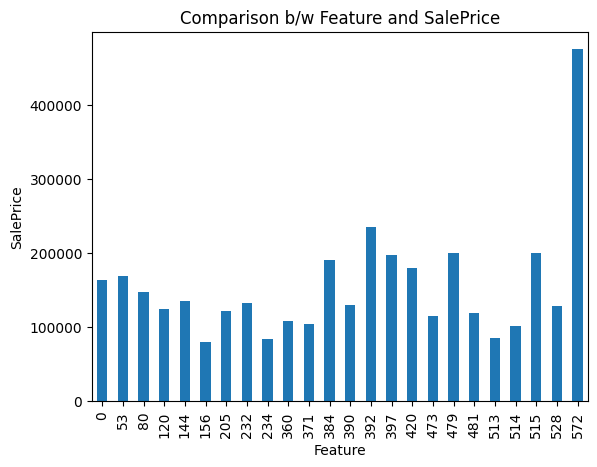

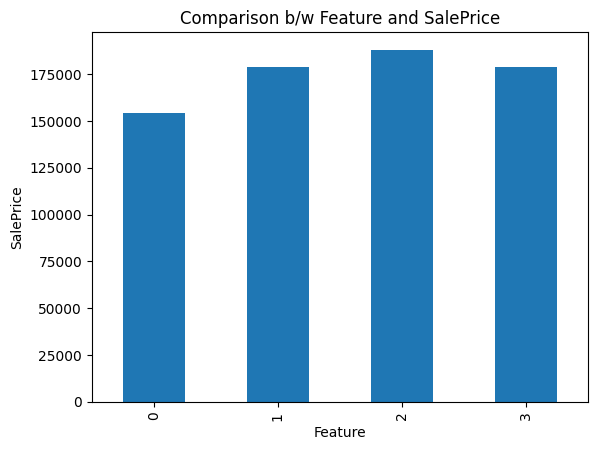

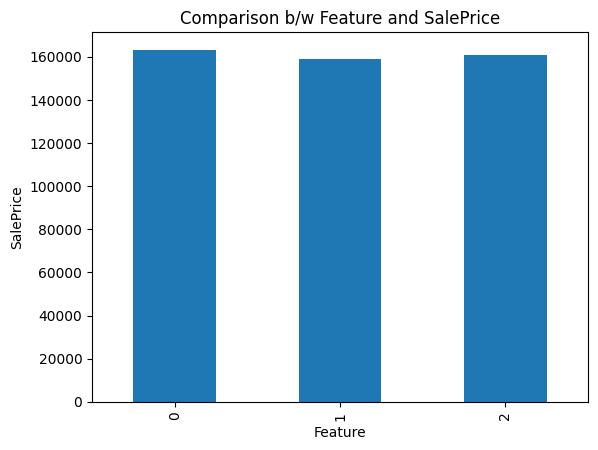

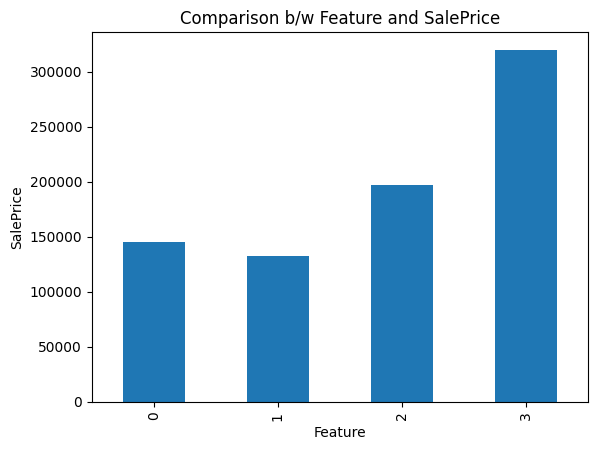

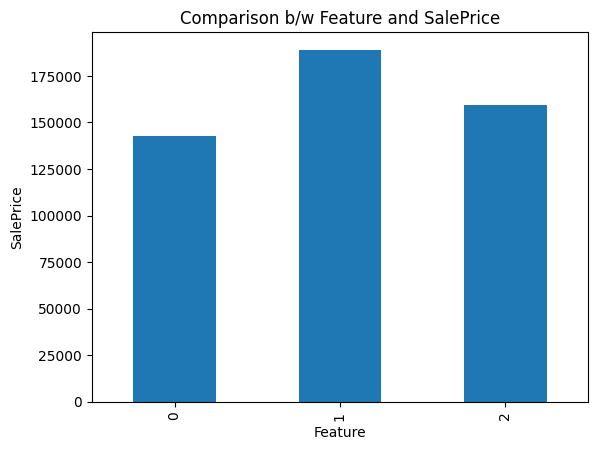

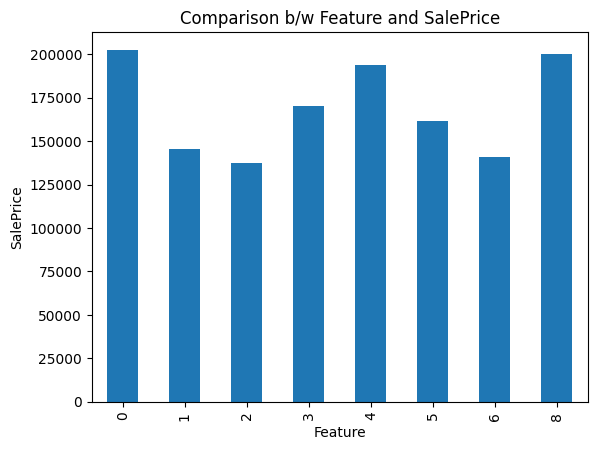

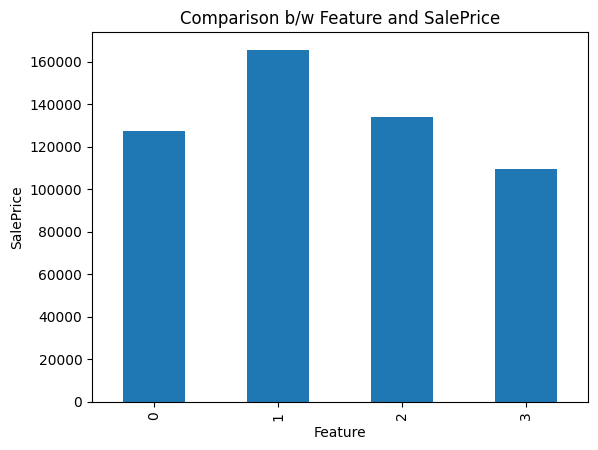

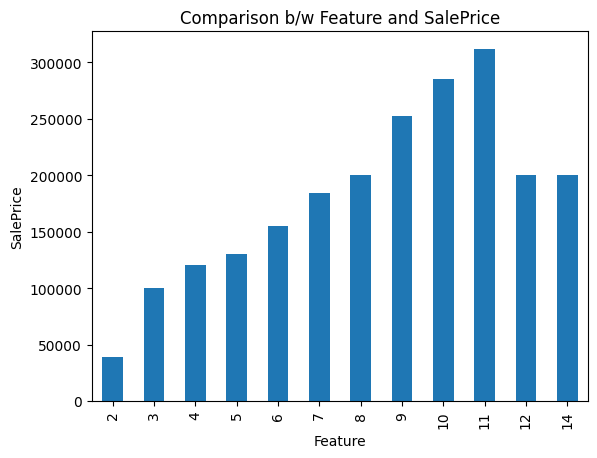

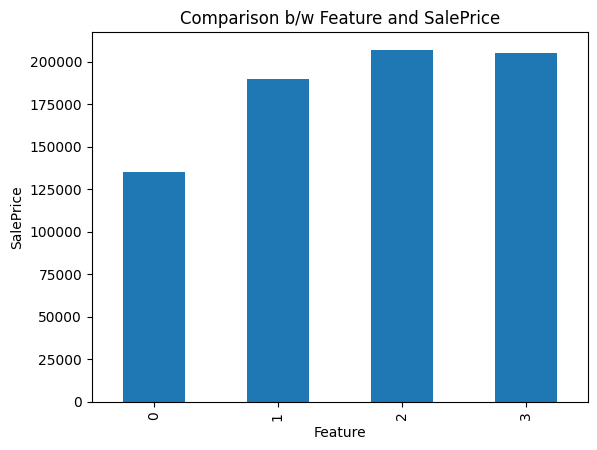

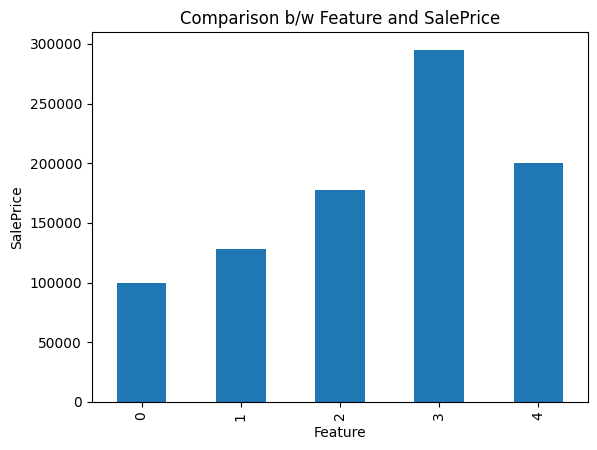

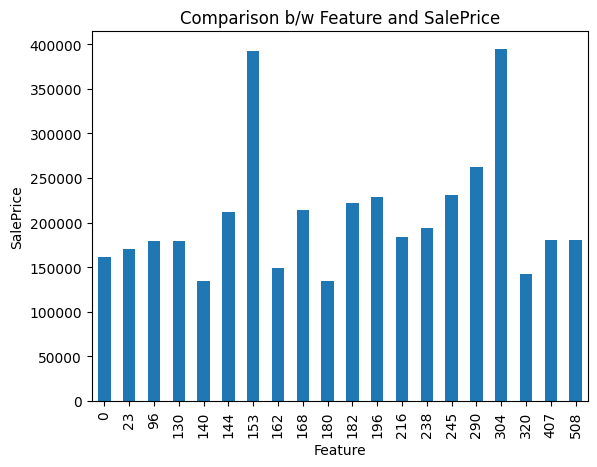

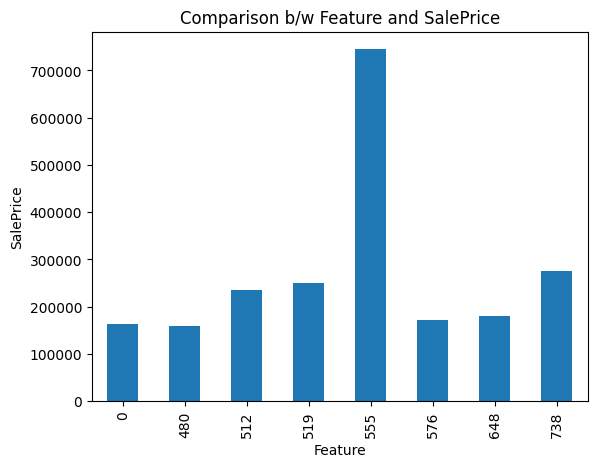

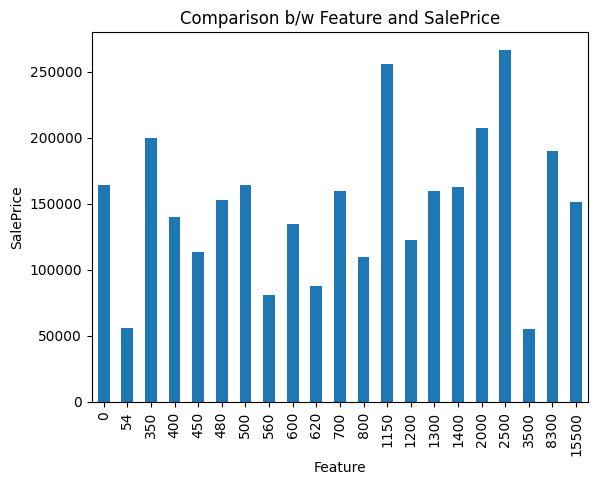

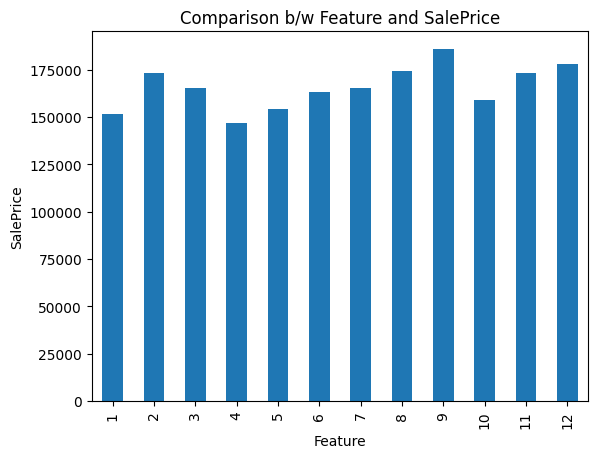

In [65]:
for i in discrete_val:
    data=df.copy()
    data.groupby(i)['SalePrice'].median().plot.bar()
    plt.xlabel('Feature')
    plt.ylabel('SalePrice')
    plt.title('Comparison b/w Feature and SalePrice')
    plt.show()

Same as the above step but for continuous valued columns against SalePrice

In [66]:
continuous_val=[i for i in num_val if i not in discrete_val+year_val+['Id']]
print(len(continuous_val))
continuous_val

16


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

Here we are using histograms to visualize the distribution of continuous values

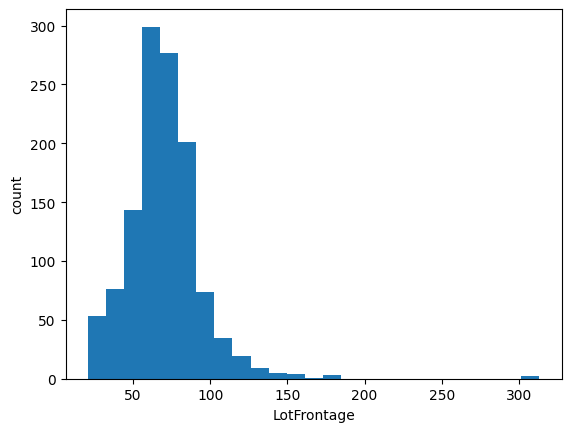

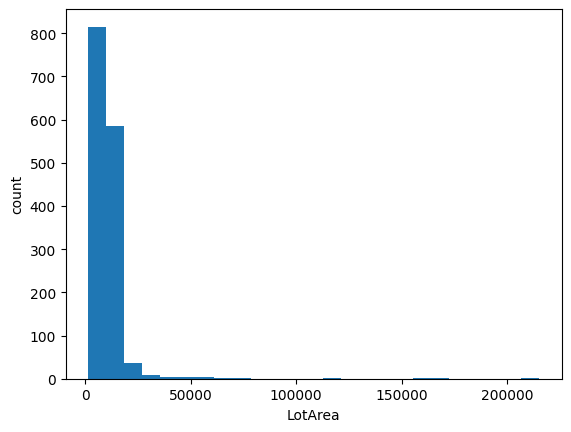

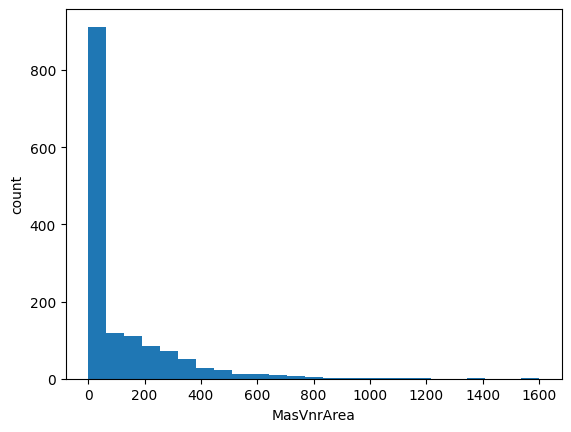

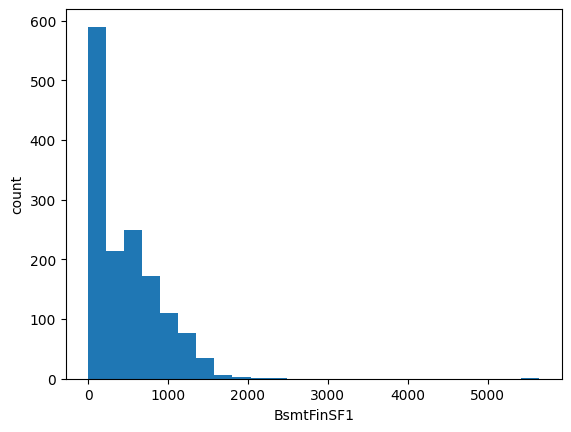

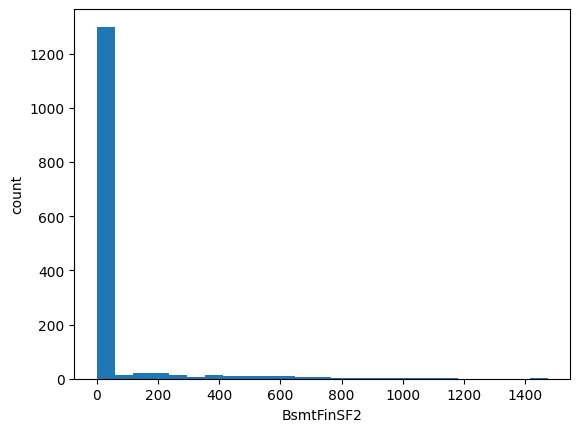

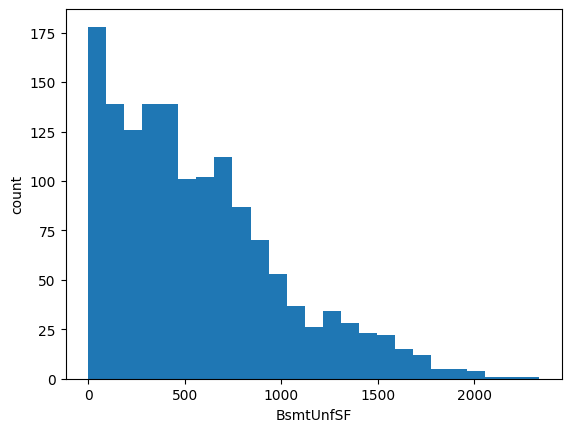

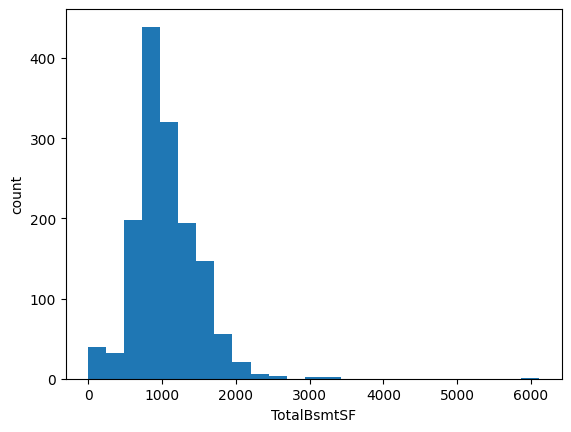

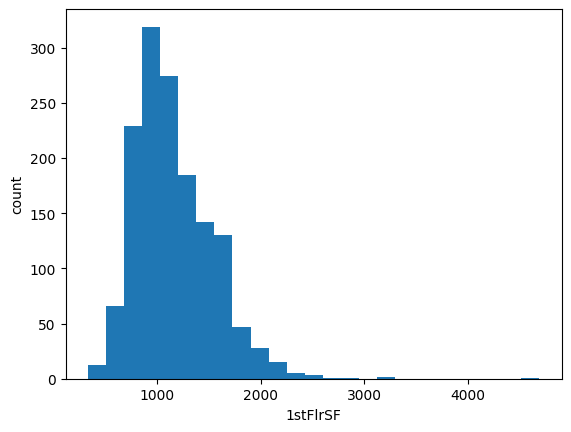

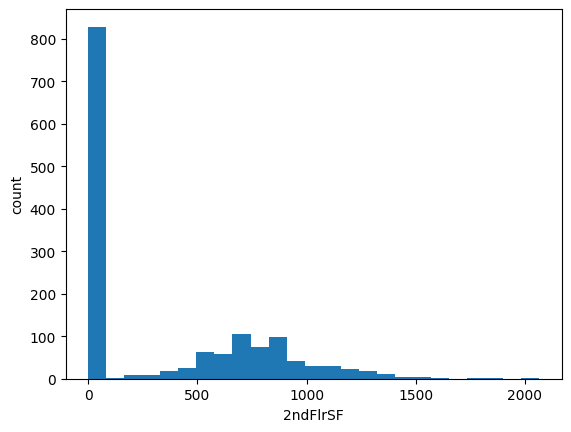

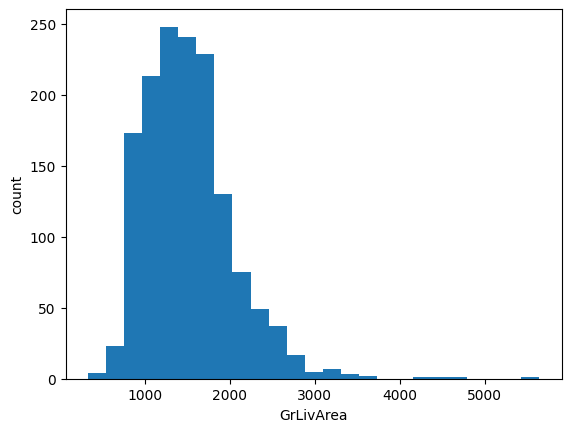

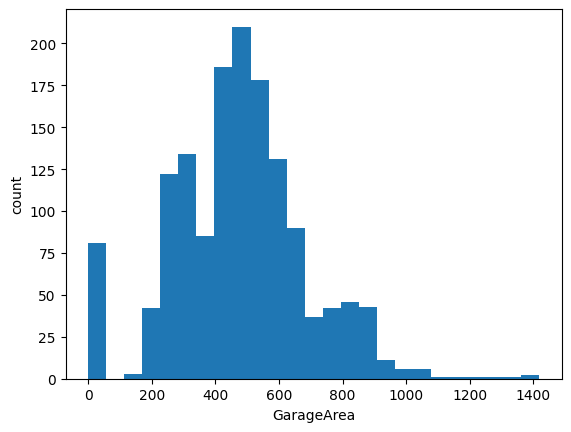

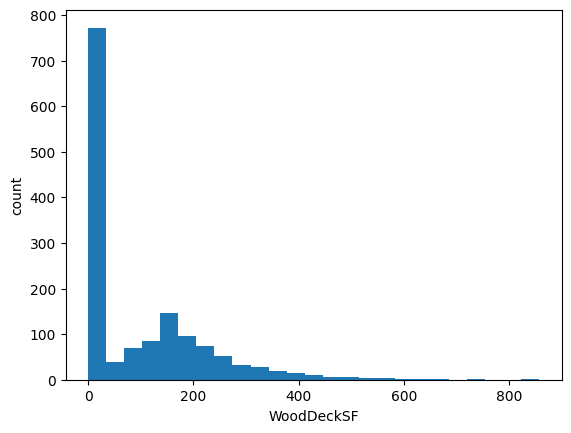

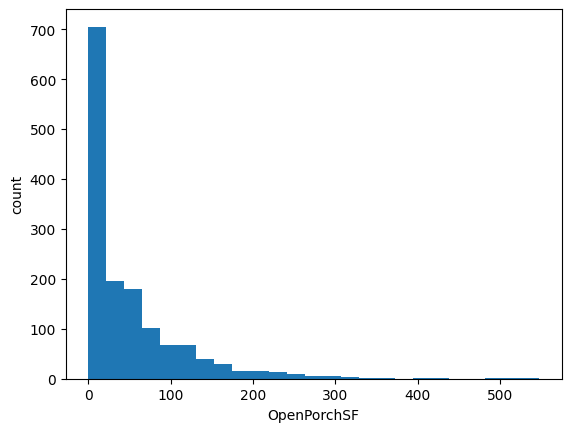

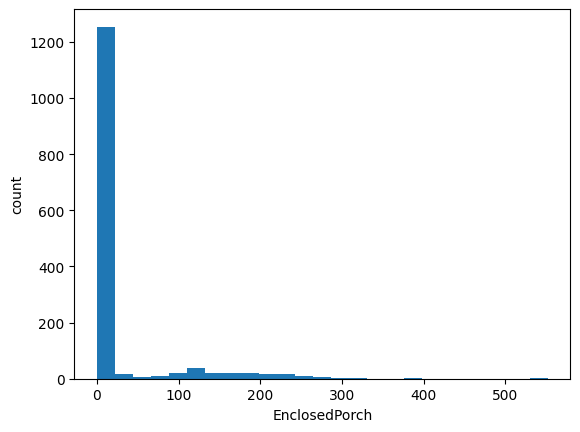

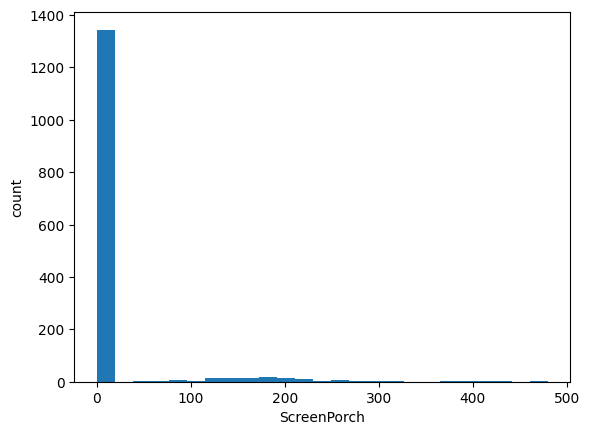

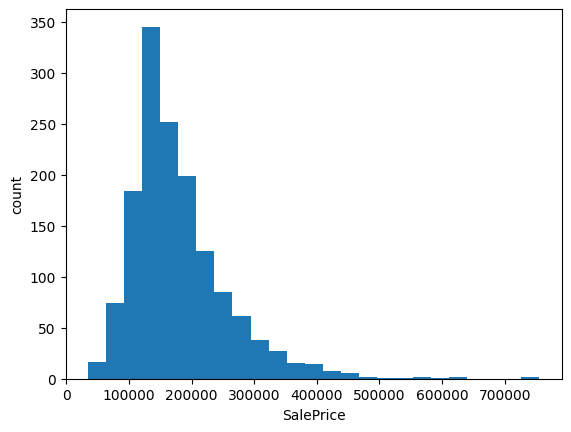

In [67]:
for i in continuous_val:
    data=df.copy()
    plt.hist(x=i,data=data,bins=25)
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()

From the above plotted graphs it is clear that even though we are dealing with continuous values but we are not able to analyse them properly because except 'SalePrice' remaining all other plots have discontinues distribution. so thats the reason we are using "Logarithm Transformation"  on remaining continuous columns values.

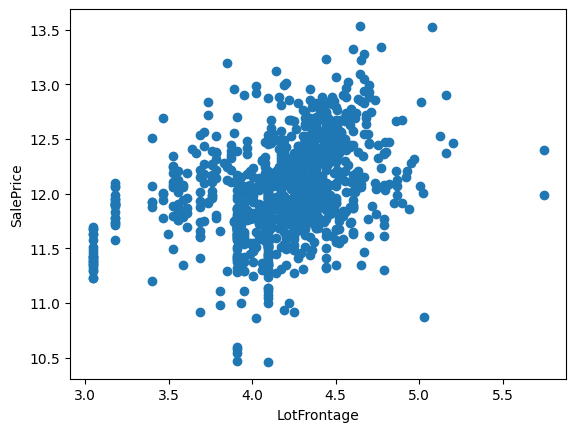

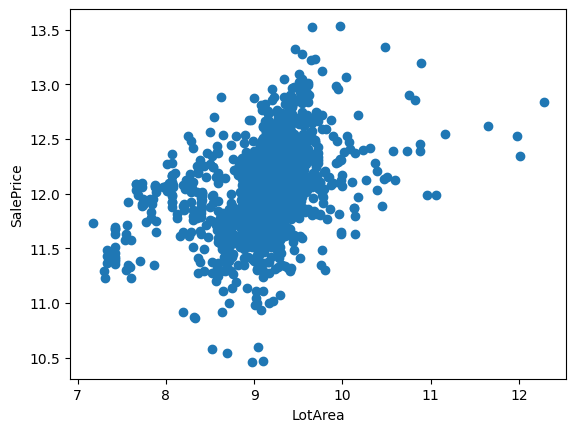

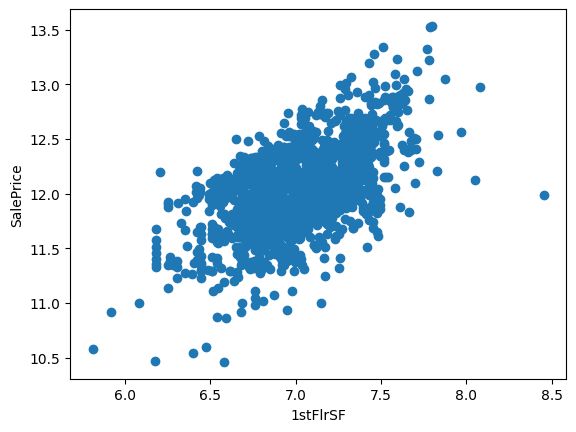

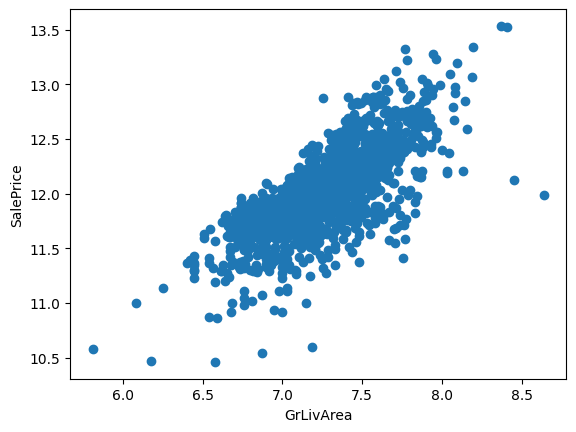

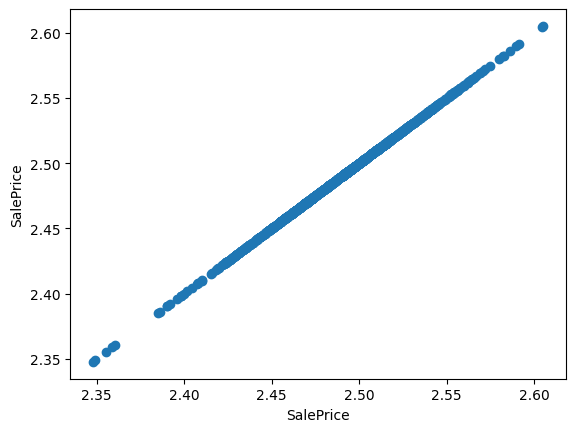

In [68]:
for i in continuous_val:
    data=df.copy()
    if 0 in data[i].unique():
        pass
    else:
        data[i]=np.log(data[i])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(x=data[i],y=data['SalePrice'])
        plt.xlabel(i)
        plt.ylabel('SalePrice')
        plt.show()

To identify the Outliers in above log tranformated distributions we use boxplot to verify and analyze

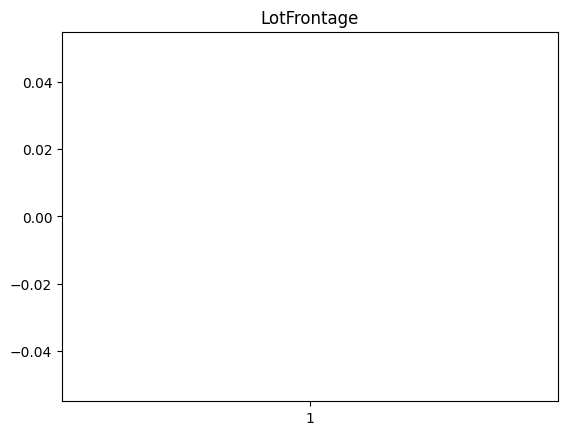

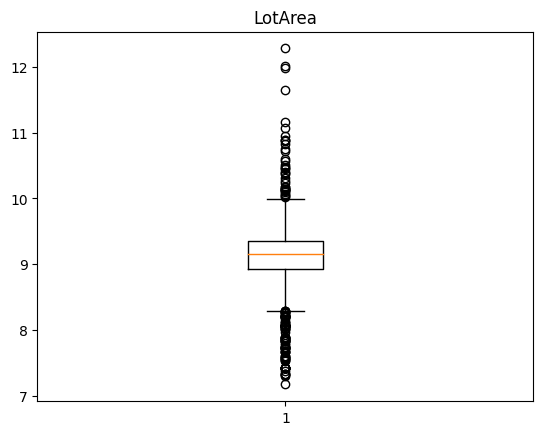

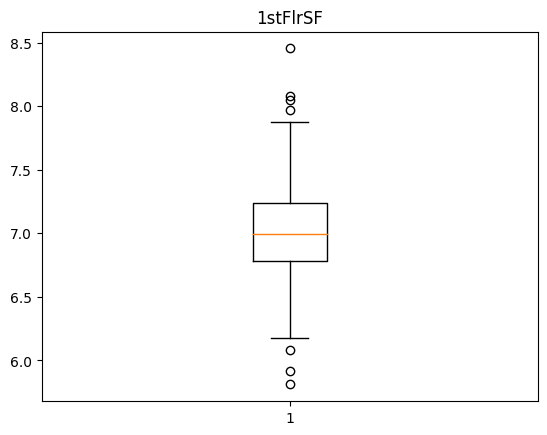

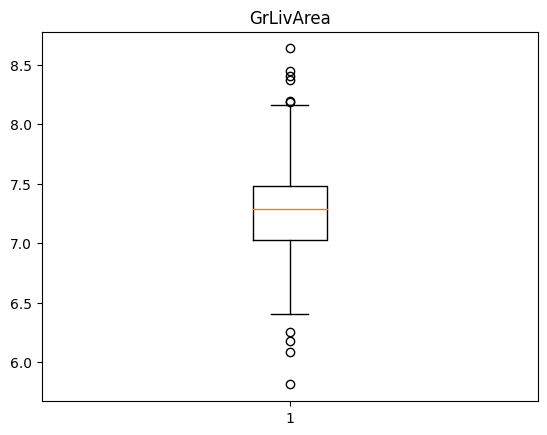

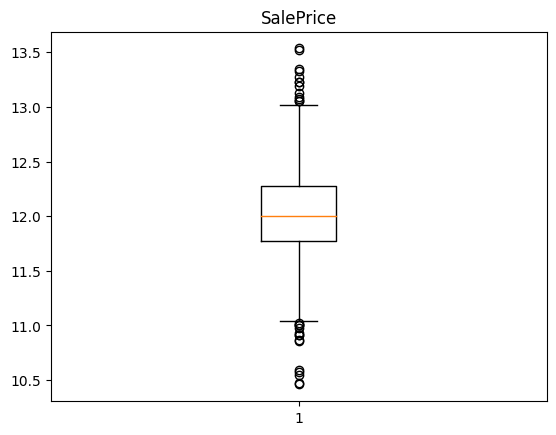

In [69]:
for i in continuous_val:
    data=df.copy()
    if 0 in data[i].unique():
        pass
    else:
        data[i]=np.log(data[i])
        plt.boxplot(x=i,data=data)
        plt.title(i)
        plt.show()

Here we are trying to find the categorical values and the no of unique values present in each of them

In [70]:
cat_val=[i for i in df.columns if df[i].dtypes=='O']
print(len(cat_val))
dfcat=df[cat_val]
for i in cat_val:
    print("{} {}".format(i,len(df[i].unique())))

43
MSZoning 5
Street 2
Alley 3
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
Heating 6
HeatingQC 5
CentralAir 2
Electrical 6
KitchenQual 4
Functional 7
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageQual 6
GarageCond 6
PavedDrive 3
PoolQC 4
Fence 5
MiscFeature 5
SaleType 9
SaleCondition 6


In this step we will visualize the variation of categorical values against SalePrice 

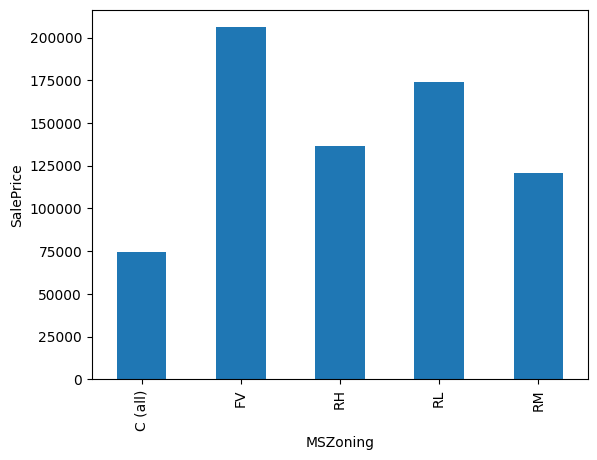

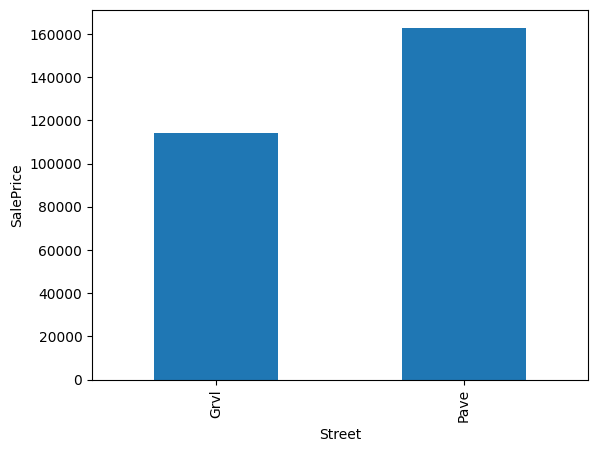

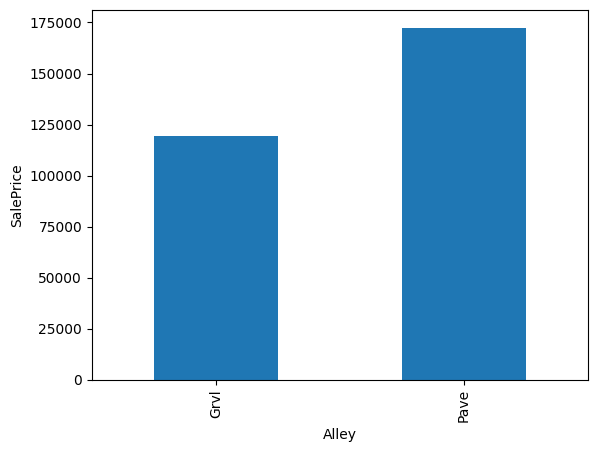

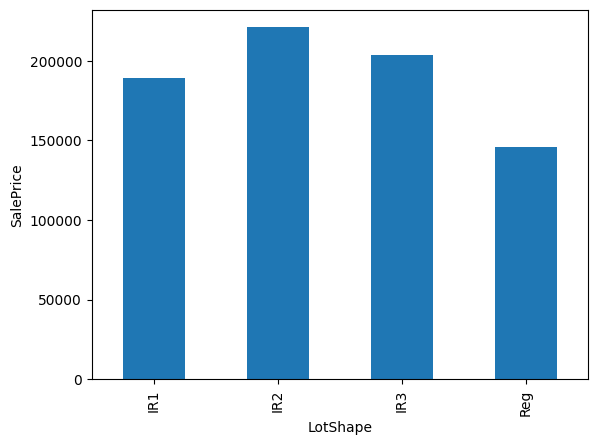

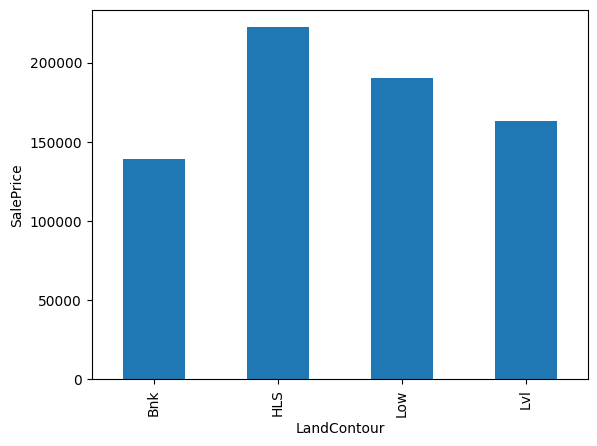

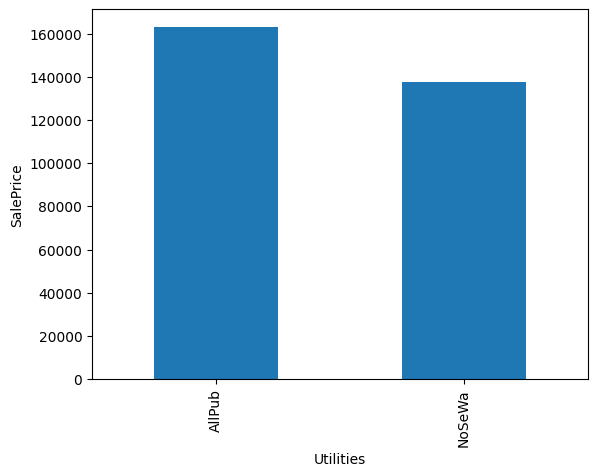

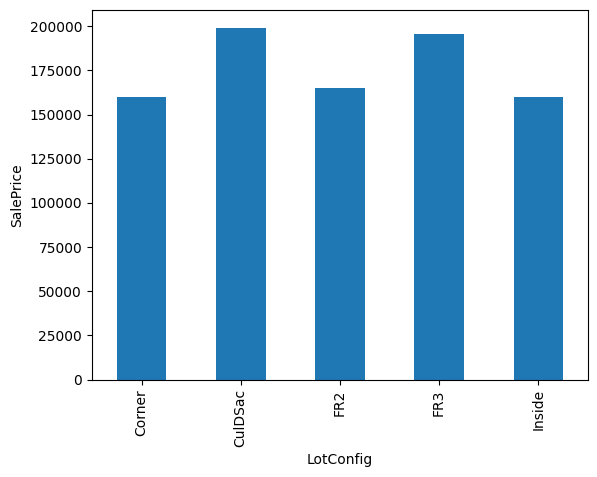

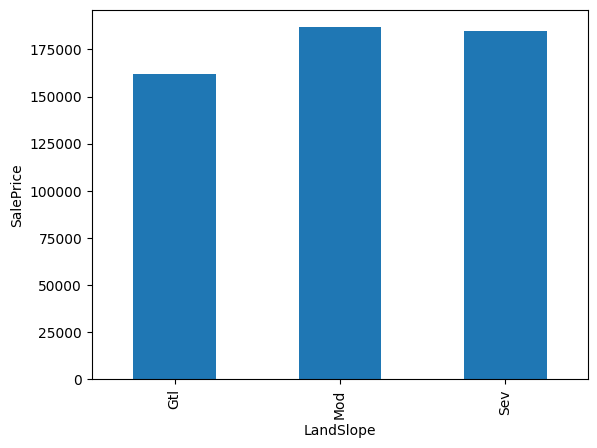

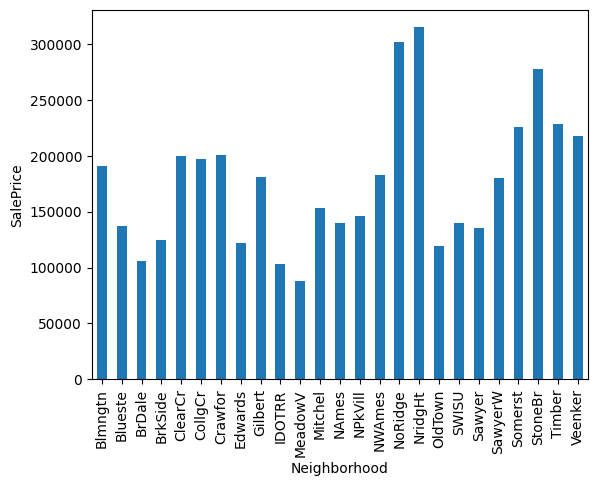

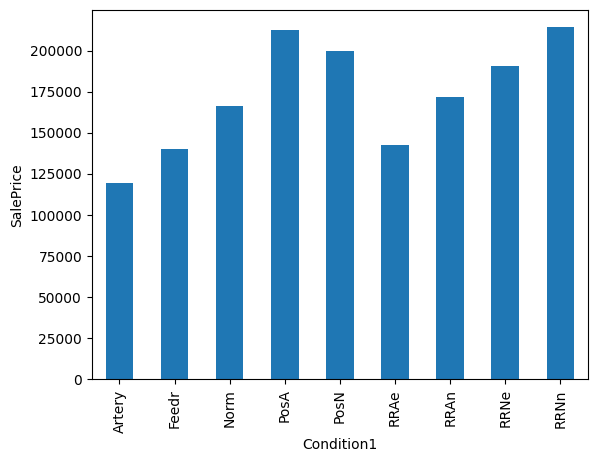

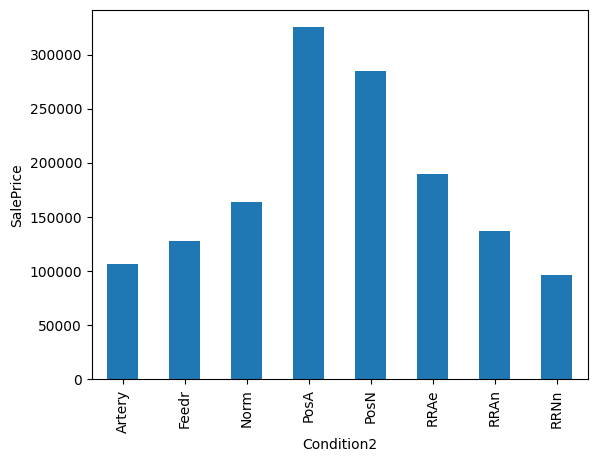

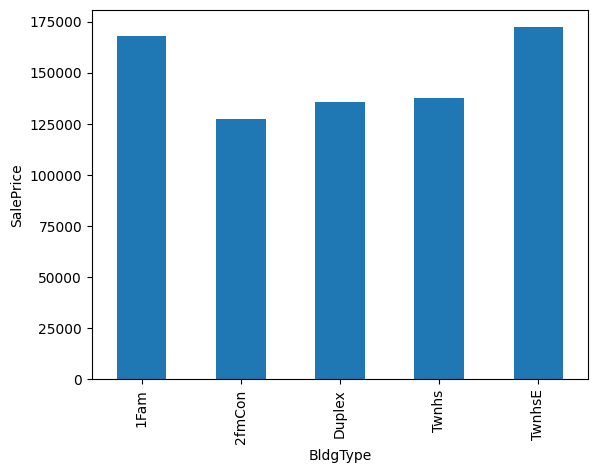

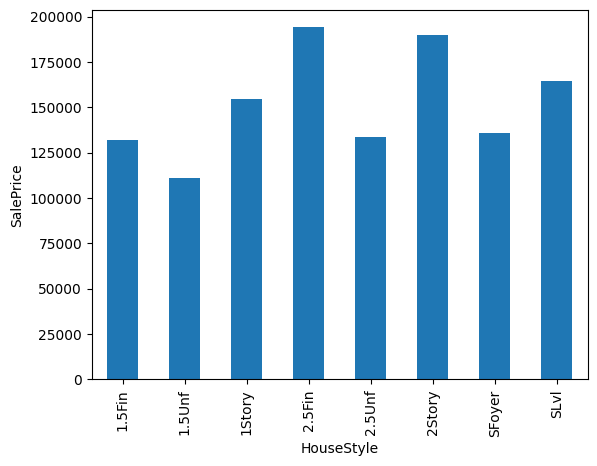

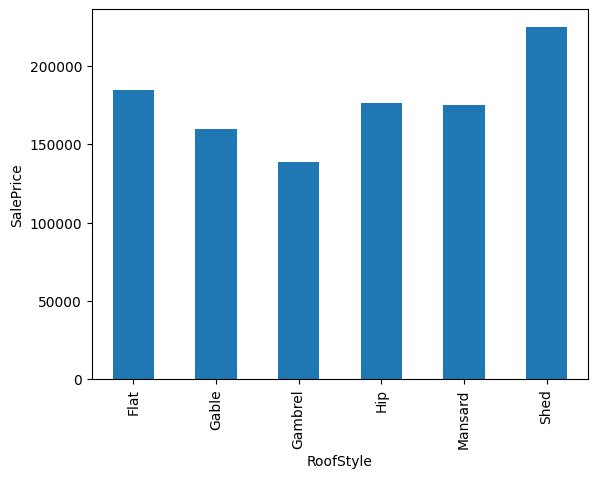

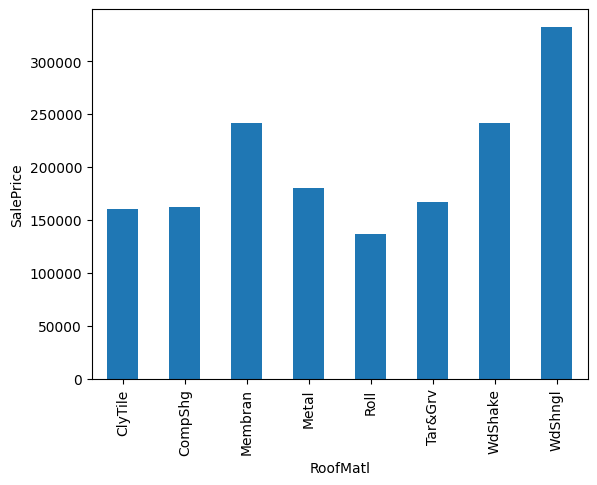

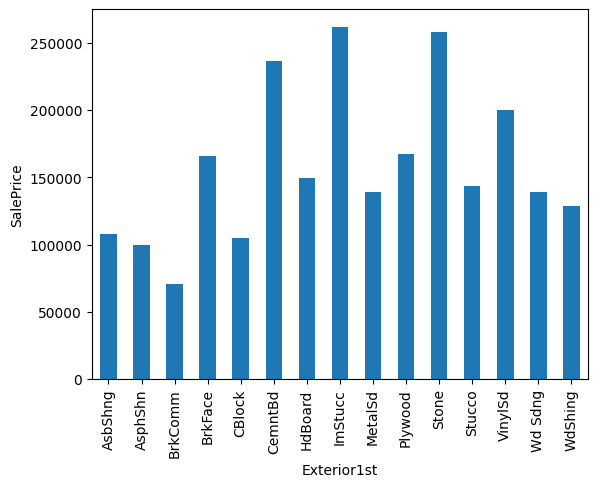

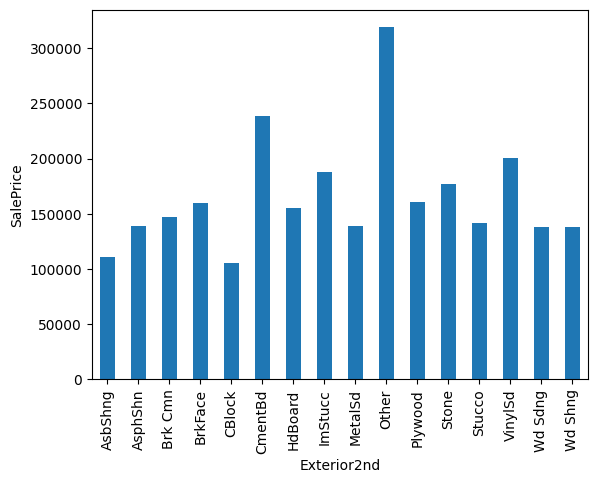

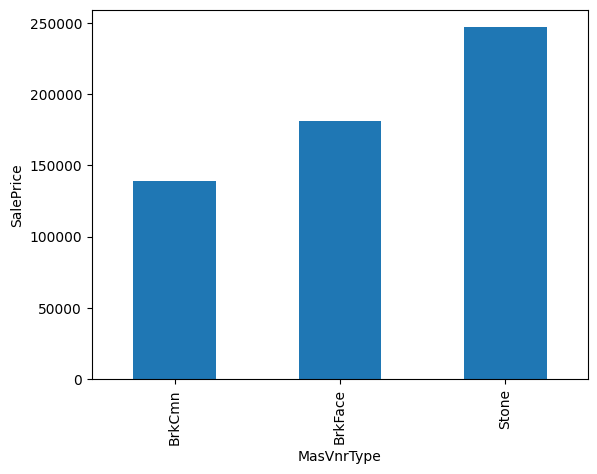

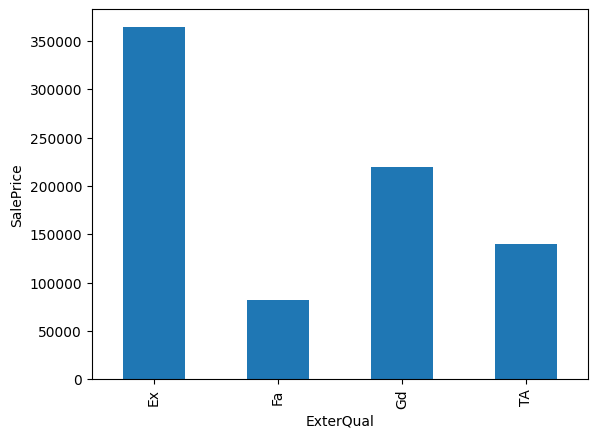

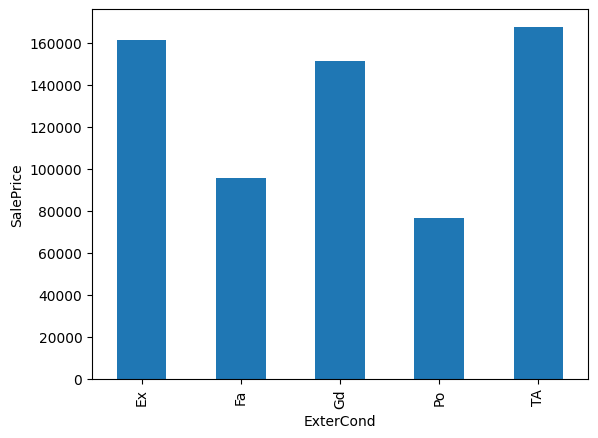

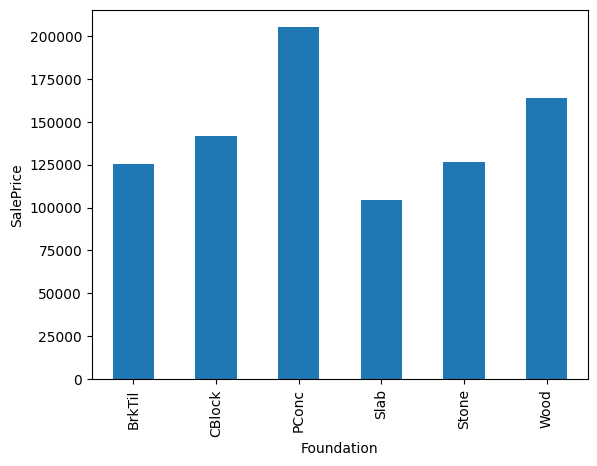

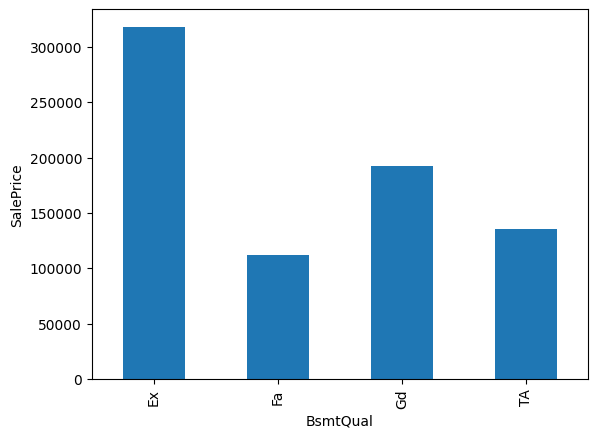

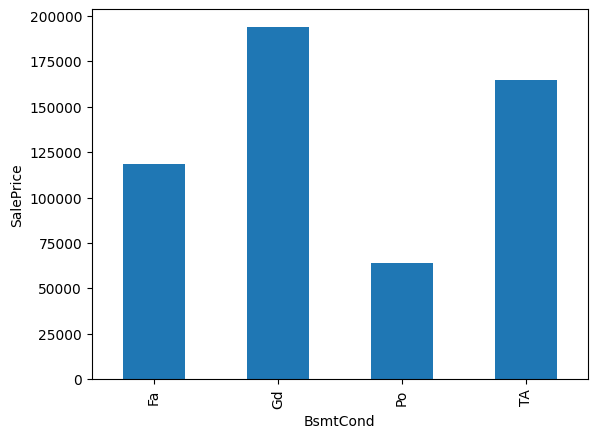

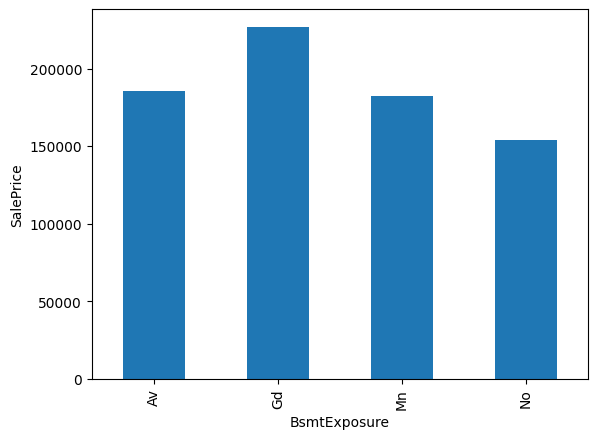

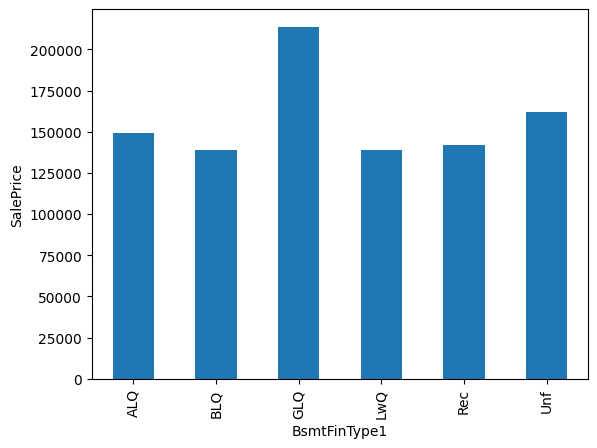

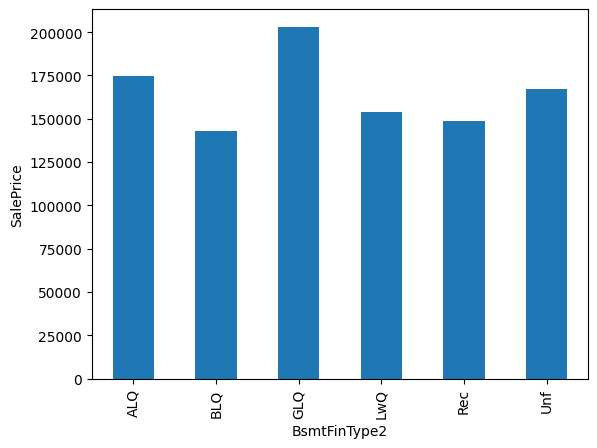

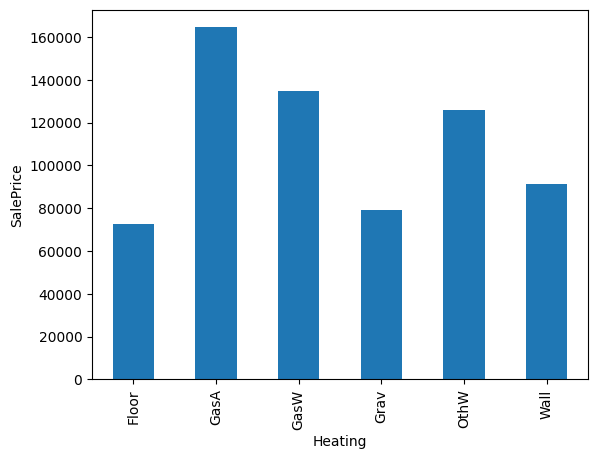

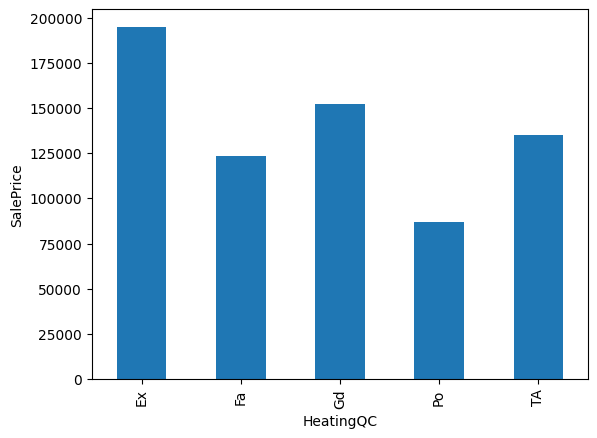

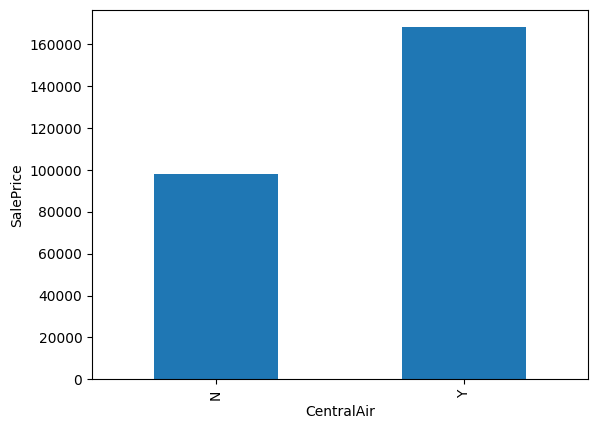

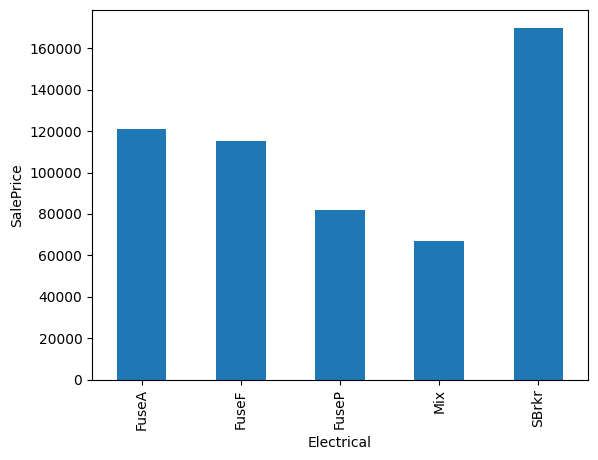

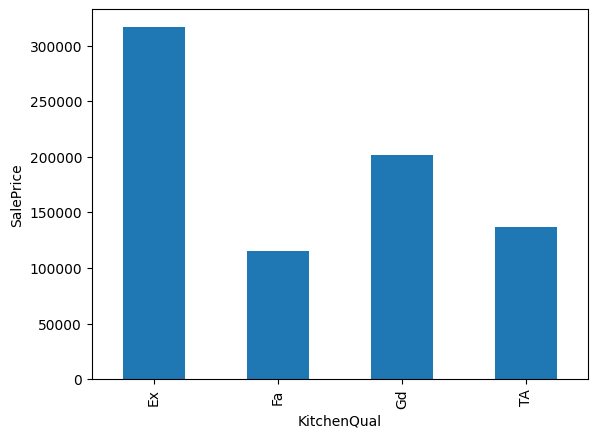

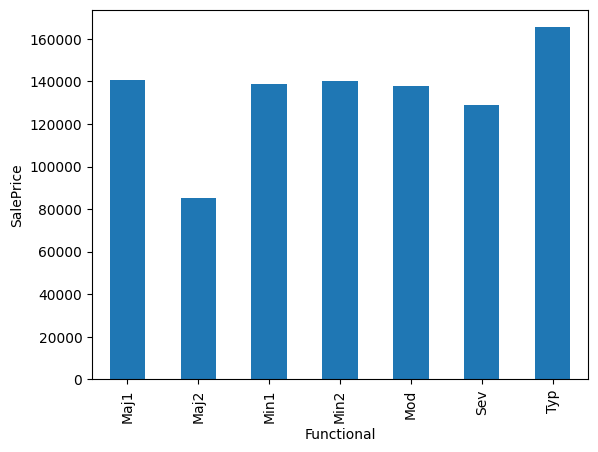

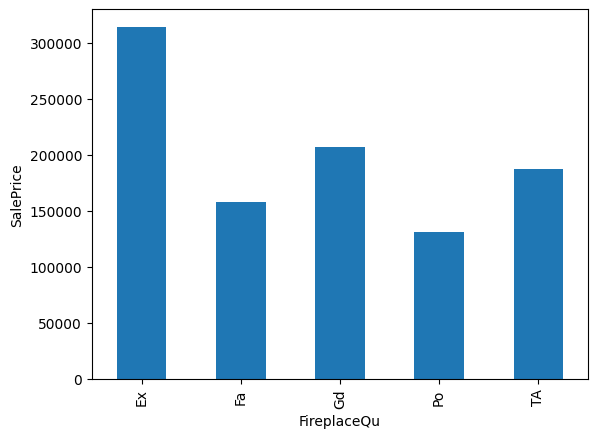

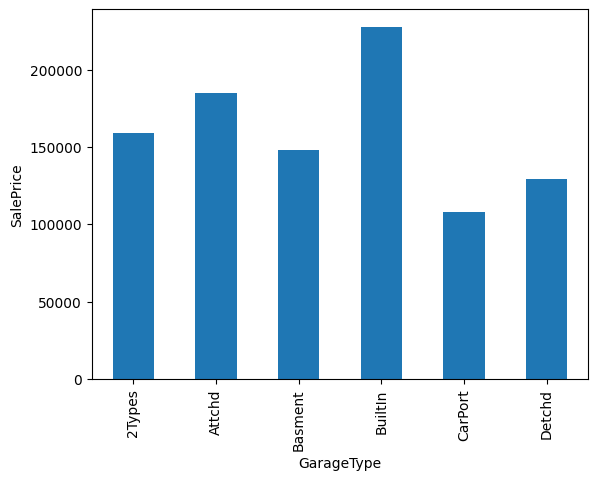

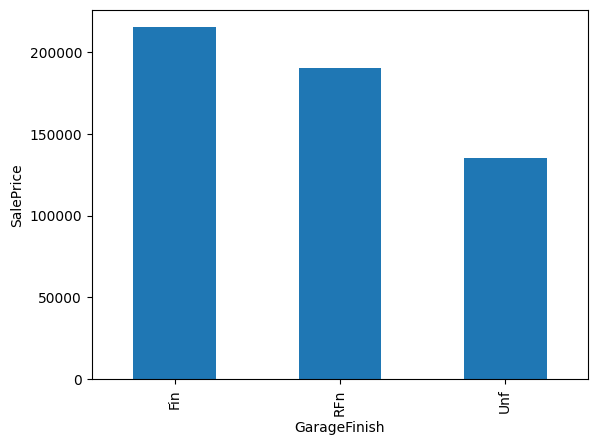

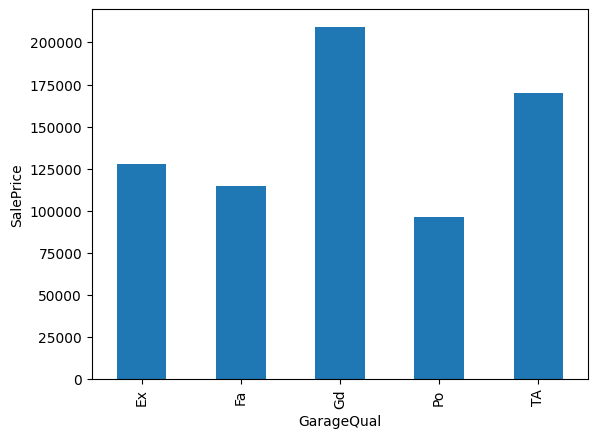

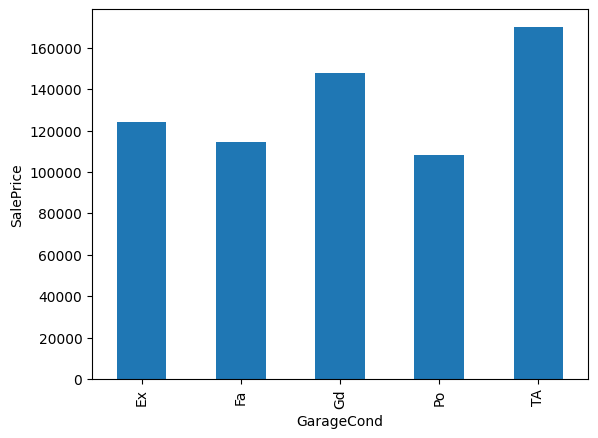

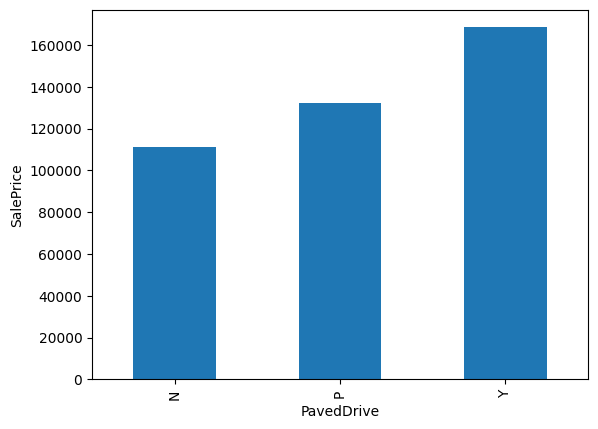

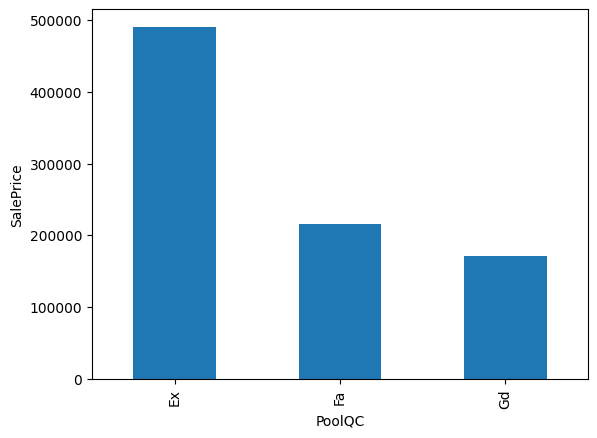

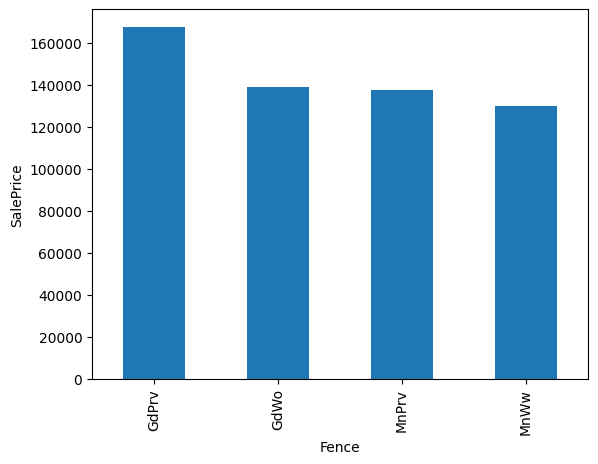

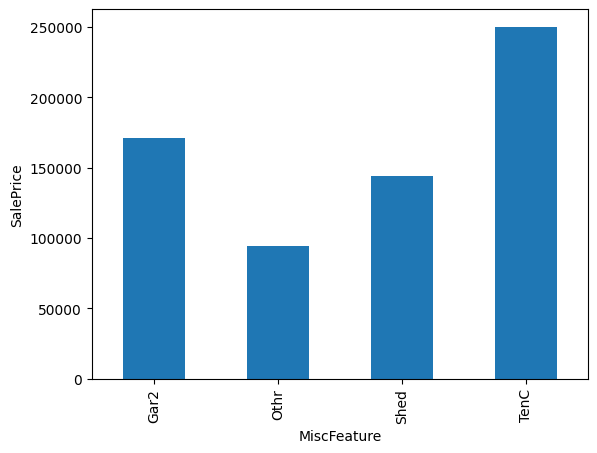

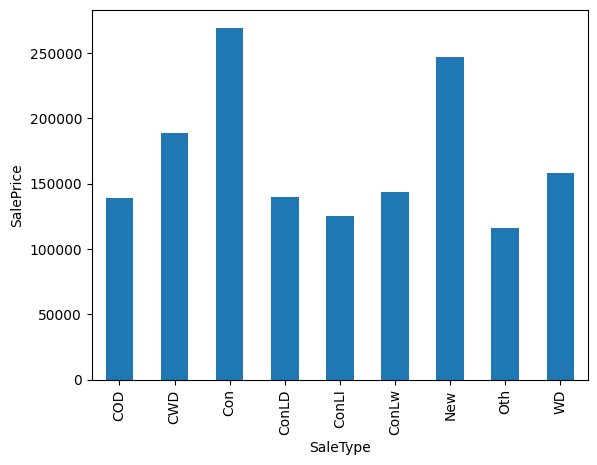

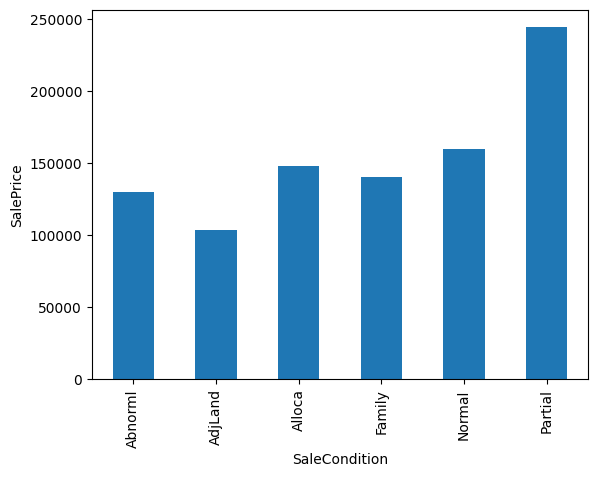

In [71]:
for i in cat_val:
    data=df.copy()
    data.groupby(i)['SalePrice'].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.show()

In [72]:
dfcat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


<Axes: >

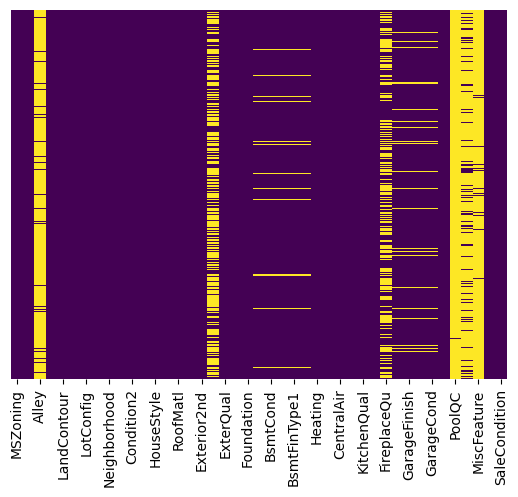

In [73]:
sns.heatmap(data=dfcat.isnull(),cmap='viridis',cbar=False,yticklabels=False)

# Feature Engineering

From here onwards I am using 'mydf' as my new dataset besides 'df' because there is some issue that gets changed in df so i make mydf=df and using mydf as my new original dataset.

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,df['SalePrice'],test_size=0.3,random_state=42)

In [75]:
x_train.shape,x_test.shape

((1022, 81), (438, 81))

Here we will find the null values present in categorical values and try to replace these missing values

In [78]:
features_nan=[feature for feature in mydf.columns if mydf[feature].isnull().sum()>1 and mydf[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(mydf[feature].isnull().mean(),4)))

Alley: 0.9377% missing values
MasVnrType: 0.5973% missing values
BsmtQual: 0.0253% missing values
BsmtCond: 0.0253% missing values
BsmtExposure: 0.026% missing values
BsmtFinType1: 0.0253% missing values
BsmtFinType2: 0.026% missing values
FireplaceQu: 0.4726% missing values
GarageType: 0.0555% missing values
GarageFinish: 0.0555% missing values
GarageQual: 0.0555% missing values
GarageCond: 0.0555% missing values
PoolQC: 0.9952% missing values
Fence: 0.8075% missing values
MiscFeature: 0.963% missing values


Here this is a new and very different step because here we will try to replace the missing values with some label(here 'missing') so that all the missing values will get chnaged to 'missing' then after this step we will try to find what the value of 'missing' label should be to procedd

In [79]:
def replace_cat_feature(mydf,features_nan):
    data=mydf.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

mydf=replace_cat_feature(mydf,features_nan)

mydf[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [80]:
mydf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


In this step we will try to find the missing values in numerical valued columns and follow the same procedure as above

In [81]:
numerical_with_nan=[feature for feature in mydf.columns if mydf[feature].isnull().sum()>1 and mydf[feature].dtypes!='O']
for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(mydf[feature].isnull().mean(),4)))

LotFrontage: 0.1774% missing value
MasVnrArea: 0.0055% missing value
GarageYrBlt: 0.0555% missing value


But instead of 'missing' label here we will use either '1' or '0' because of numerical columns

In [82]:
for feature in numerical_with_nan:
    median_value=mydf[feature].median()
    mydf[feature+'nan']=np.where(mydf[feature].isnull(),1,0)
    mydf[feature].fillna(median_value,inplace=True)
    
mydf[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [83]:
mydf.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,Missing,IR1,Lvl,AllPub,...,Shed,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,69.0,10382,Pave,Missing,IR1,Lvl,AllPub,...,Shed,350,11,2009,WD,Normal,200000,1,0,0
8,9,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,4,2008,WD,Abnorml,129900,0,0,0
9,10,190,RL,50.0,7420,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,1,2008,WD,Normal,118000,0,0,0


Now we perform temporal values for date time variables

In [84]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:     
    mydf[feature]=mydf['YrSold']-mydf[feature]

In [85]:
mydf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,250000,0,0,0


In [86]:
mydf[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


In [87]:
continuous_val

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

Here we will convert the numerical continuous column values into log values through normal log transformation where the column values should not have '0' in it.

In [88]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
for feature in num_features:
    mydf[feature]=np.log(mydf[feature])

In [89]:
mydf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


In [91]:
print(len(cat_val))
cat_val

43


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [93]:
for i in cat_val:
    temp=mydf.groupby(i)['SalePrice'].count()/len(mydf)
    temp_df=temp[temp>0.01].index
    mydf[i]=np.where(mydf[i].isin(temp_df),mydf[i],'Rare_var')

In [94]:
mydf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


In [97]:
for i in cat_val:
    label_order=mydf.groupby([i])['SalePrice'].mean().sort_values().index
    label_order={k:j for j,k in enumerate(label_order,0)}
    mydf[i]=mydf[i].map(label_order)

In [98]:
scalecolumn=[i for i in mydf.columns if i not in ['Id','SalePrice']]
print(len(scalecolumn))
scalecolumn

82


['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [99]:
mydf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,3,4.174387,9.041922,1,2,0,1,1,...,2,0,2,2008,2,3,12.247694,0,0,0
1,2,20,3,4.382027,9.169518,1,2,0,1,1,...,2,0,5,2007,2,3,12.109011,0,0,0
2,3,60,3,4.219508,9.328123,1,2,1,1,1,...,2,0,9,2008,2,3,12.317167,0,0,0
3,4,70,3,4.094345,9.164296,1,2,1,1,1,...,2,0,2,2006,2,0,11.849398,0,0,0
4,5,60,3,4.430817,9.565214,1,2,1,1,1,...,2,0,12,2008,2,3,12.429216,0,0,0


**In this step we will try to implement "Feature Scaling" procedure**

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(mydf[scalecolumn])

MinMaxScaler()

In [101]:
 scaler.transform(mydf[scalecolumn])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

In [104]:
data = pd.concat([mydf[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(mydf[scalecolumn]), columns=scalecolumn)],
                    axis=1)
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,...,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,...,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,...,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,...,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,...,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


Now we copy this perfect data for further data analysis as a train_csv file.

In [105]:
data.to_csv("x_train.csv",index=False)

Now we will use this x_train file for "Feature Selection" Process 

# Feature Selection

In [107]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import SelectFromModel

ImportError: cannot import name 'SelectFromModel' from 'sklearn.model_selection' (/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/__init__.py)